# Solar Cell Experiment

In [1]:
from IPython.display import Image

## Modules to Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
from numpy import polyfit
import sympy as smp
import pandas as pd
import seaborn as sns

In [3]:
def maxfinder(x_array, y_array):
    for i in range(len(y_array)):
        if y_array[i] == y_array.max():
            return x_array[i], y_array[i]

## Plots

### Voltage vs. $\frac{1}{d^2}$

In [4]:
data1 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot1')
display(data1.head())
x1 = data1['1/d2 in 1/mm2'].to_numpy()
y1 = data1['V in mV'].to_numpy()

,d in mm,1/d2 in 1/mm2,V in mV
0,800,0.000002,0.7
1,775,0.000002,0.8
2,750,0.000002,0.8
3,725,0.000002,0.9
4,700,0.000002,0.9


In [5]:
def linfit(V, a, b):
    return a*V + b
popt, pcov = curve_fit(linfit, x1, y1, p0=[1e5, 0.1])
p1, p2 = popt
x1f = np.linspace(x1.min(), x1.max(), 100)
y1f = linfit(x1f, p1, p2)

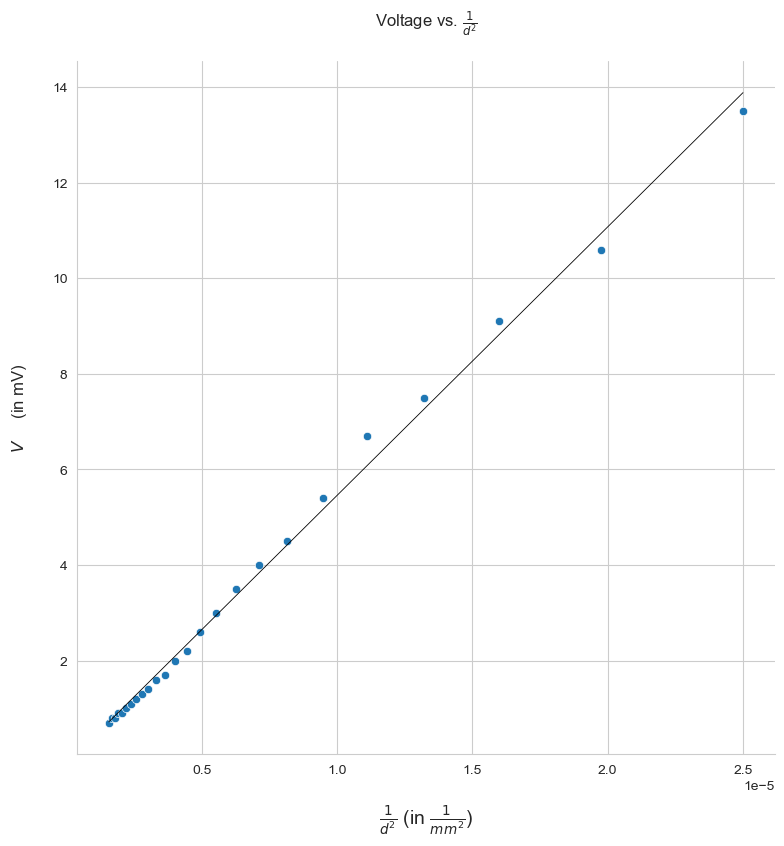

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,9))
# sns.lineplot(data=data1, x='1/d2 in 1/mm2', y='V in mV', palette='Set1', linewidth=0.4)
plt.plot(x1f, y1f, 'black', lw=0.6)
sns.scatterplot(data=data1, x='1/d2 in 1/mm2', y='V in mV', palette='Set1')
sns.despine()
plt.title('Voltage vs. $\\frac{1}{d^2}$\n')
plt.xlabel('\n$\\frac{1}{d^2}$\t(in $\\frac{1}{mm^2}$)', fontsize=14)
plt.ylabel('$V$\t(in mV)\n', fontsize=12)
# plt.xlim(0,1)
# plt.xticks(np.arange(-0.5, 8, 0.5))
# plt.yticks(np.arange(-0.05, 0.9, 0.05))
plt.savefig('plot1', dpi=300)
# plt.savefig('Voltage vs inv sq distance', dpi=300)
plt.show()

### Short circuit current vs. Open circuit voltage

In [7]:
data2 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot2')
display(data2.head())
x2 = data2['Vopen in V'].to_numpy()
y2 = data2['Ishort in mA'].to_numpy()

,distance in mm,Ishort in mA,Vopen in V
0,500,68.0,2.03
1,600,47.2,1.98
2,700,32.6,1.92
3,800,23.6,1.87


In [8]:
def VopenIshortfn(V, a, b):
    return a*V + b
popt, pcov = curve_fit(VopenIshortfn, x2, y2, p0=[200, 1])
p1, p2 = popt
x2f = np.linspace(x2.min(), x2.max(), 100)
y2f = VopenIshortfn(x2f, p1, p2)

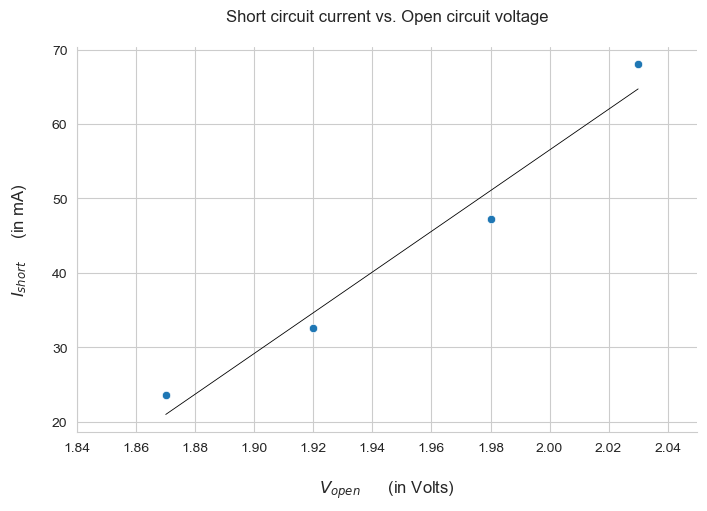

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
# sns.lineplot(data=data2, x='Vopen in V', y='Ishort in mA', palette='Set1', linewidth=0.4)
plt.plot(x2f, y2f, 'black', lw=0.6)
sns.scatterplot(data=data2, x='Vopen in V', y='Ishort in mA', palette='Set1')
sns.despine()
plt.title('Short circuit current vs. Open circuit voltage\n')
plt.xlabel('\n$V_{open}$\t(in Volts)', fontsize=12)
plt.ylabel('$I_{short}$\t(in mA)\n', fontsize=12)
plt.xlim(1.84, 2.05)
plt.xticks(np.arange(1.84, 2.05, 0.02))
plt.yticks(np.arange(20, 71, 10))
plt.savefig('plot2', dpi=300)
# plt.savefig('Short circuit current vs Open circuit voltage', dpi=200)
plt.show()

### I-V Characteristics with normal conditions

In [10]:
data3 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot3')
display(data3.head())
x3 = data3['V in V'].to_numpy()
y3 = data3['I in mA'].to_numpy()
x31, y31 = x3[:17], y3[:17]
x32, y32 = x3[17:32], y3[17:32]
x33, y33 = x3[32:47], y3[32:47]
x34, y34 = x3[47:], y3[47:]

,distance in mm,V in V,I in mA
0,500,2.05,8.7
1,500,2.05,9.2
2,500,2.05,9.7
3,500,2.04,10.8
4,500,2.04,11.9


In [11]:
def Ifit(V, c1, c2, c3):
    return c1 - c2*np.exp(c3*V)

popt, pcov = curve_fit(Ifit, x31, y31, p0=[70,1e-6,8])
p1, p2, p3 = popt
x31f = np.linspace(x31.min(), x31.max(), 100)
y31f = Ifit(x31f, p1, p2, p3)
print(f'Fitting parameters (I0, k, k0) for d=500mm: {p1, p2, p3}')

popt, pcov = curve_fit(Ifit, x32, y32, p0=[45,1e-6,8])
p1, p2, p3 = popt
x32f = np.linspace(x32.min(), x32.max(), 100)
y32f = Ifit(x32f, p1, p2, p3)
print(f'Fitting parameters (I0, k, k0) for d=600mm: {p1, p2, p3}')

popt, pcov = curve_fit(Ifit, x33, y33, p0=[30,1e-6,8])
p1, p2, p3 = popt
x33f = np.linspace(x33.min(), x33.max(), 100)
y33f = Ifit(x33f, p1, p2, p3)
print(f'Fitting parameters (I0, k, k0) for d=700mm: {p1, p2, p3}')

popt, pcov = curve_fit(Ifit, x34, y34, p0=[20,1e-6,1])
p1, p2, p3 = popt
x34f = np.linspace(x34.min(), x34.max(), 100)
y34f = Ifit(x34f, p1, p2, p3)
print(f'Fitting parameters (I0, k, k0) for d=800mm: {p1, p2, p3}')

Fitting parameters (I0, k, k0) for d=500mm: (73.32089137566432, 7.753541914227178e-07, 8.896502384567702)
Fitting parameters (I0, k, k0) for d=600mm: (45.19780419694685, 8.554183195928145e-06, 7.630798922727154)
Fitting parameters (I0, k, k0) for d=700mm: (31.885461393573205, 9.627949160406765e-06, 7.61254078464769)
Fitting parameters (I0, k, k0) for d=800mm: (22.50185307766419, 6.466349504255205e-06, 8.028000993185728)


C:\Users\suman\AppData\Local\Temp\ipykernel_19288\128779860.py:2: RuntimeWarning: overflow encountered in exp
  return c1 - c2*np.exp(c3*V)


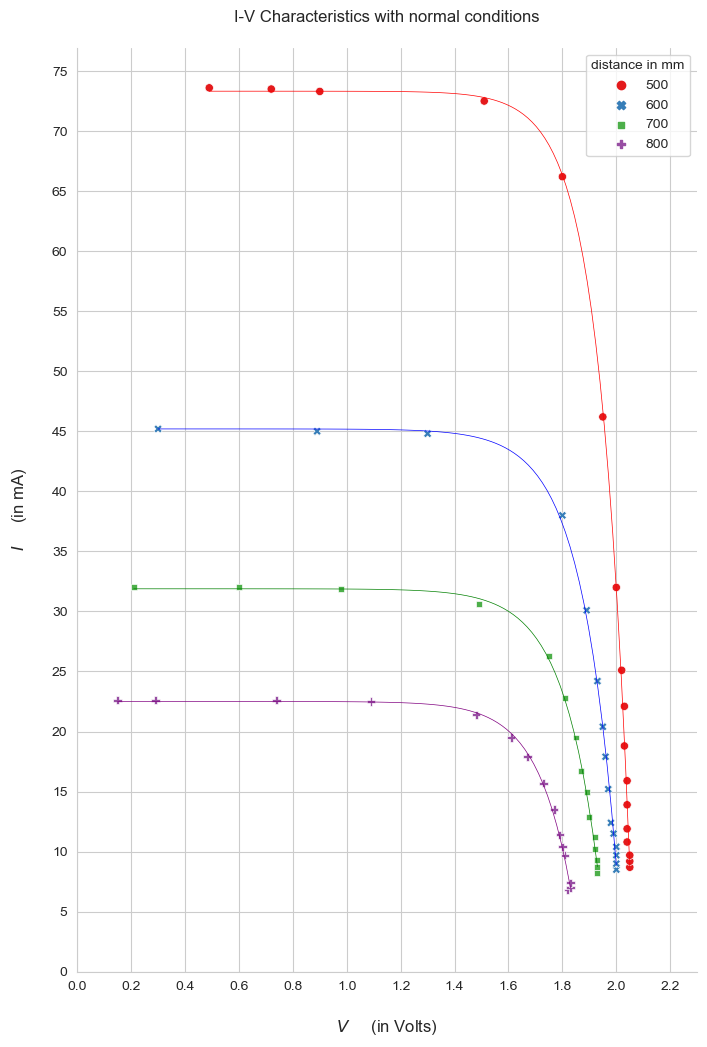

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,12))
# sns.lineplot(data=data3, x='V in V', y='I in mA', hue='distance in mm', palette='Set1', linewidth=0.4)
plt.plot(x31f, y31f, 'red', lw=0.5)
plt.plot(x32f, y32f, 'blue', lw=0.5)
plt.plot(x33f, y33f, 'green', lw=0.5)
plt.plot(x34f, y34f, 'purple', lw=0.5)
sns.scatterplot(data=data3, x='V in V', y='I in mA', hue='distance in mm', 
                style='distance in mm', palette='Set1')
sns.despine()
plt.title('I-V Characteristics with normal conditions\n')
plt.xlabel('\n$V$\t(in Volts)', fontsize=12)
plt.ylabel('$I$\t(in mA)\n', fontsize=12)
plt.xlim(0,2.3)
plt.xticks(np.arange(0, 2.3, 0.2))
plt.yticks(np.arange(0, 80, 5))
plt.savefig('plot3', dpi=300)
# plt.savefig('I-V Characteristics with normal conditions', dpi=300)
plt.show()

### I-V Characteristics in a different temperature (using blower)

In [13]:
data4 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot4')
display(data4.head())
x4 = data4['V in V'].to_numpy()
y4 = data4['I in mA'].to_numpy()

,distance in mm,V in V,I in mA
0,600,1.98,8.3
1,600,1.98,8.9
2,600,1.97,9.4
3,600,1.96,10.2
4,600,1.96,11.0


In [14]:
popt, pcov = curve_fit(Ifit, x4, y4, p0=[45,1e-6,8])
p1, p2, p3 = popt
x4f = np.linspace(x4.min(), x4.max(), 100)
y4f = Ifit(x32f, p1, p2, p3)
print(f'Fitting parameters (I0, k, k0) for d=600mm: {p1, p2, p3}')

Fitting parameters (I0, k, k0) for d=600mm: (44.55345684705238, 0.0006194878222804856, 5.559499720420925)


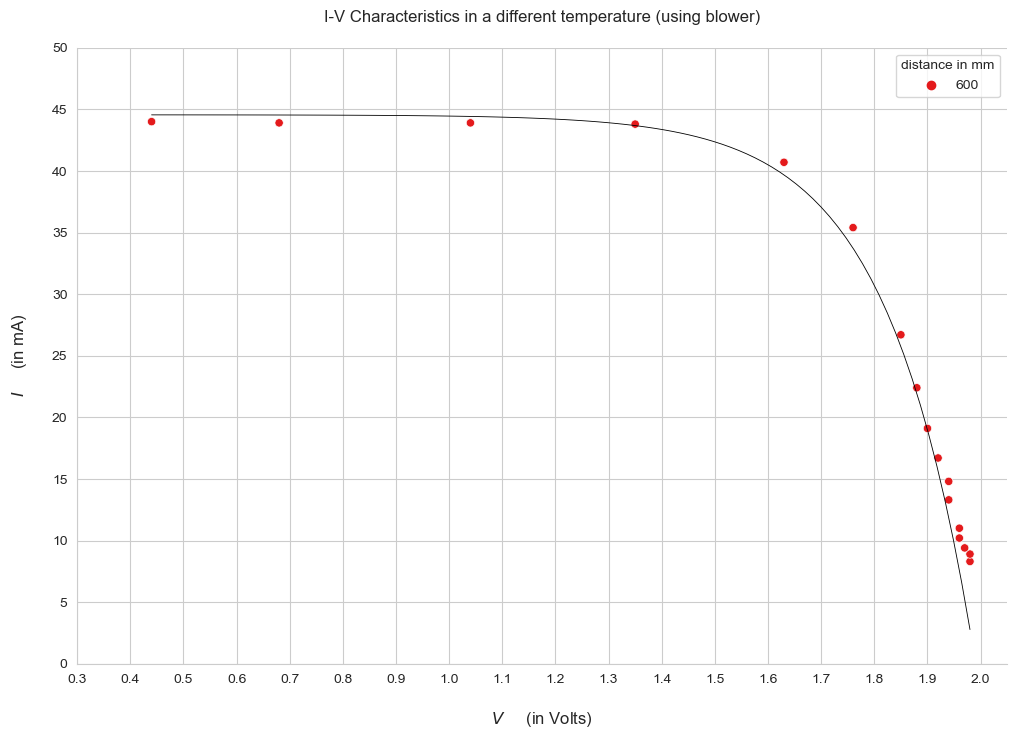

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
# sns.lineplot(data=data4, x='V in V', y='I in mA', hue='distance in mm', palette='Set1', linewidth=0.4)
plt.plot(x4f, y4f, 'black', lw=0.6)
sns.scatterplot(data=data4, x='V in V', y='I in mA', hue='distance in mm', 
                style='distance in mm', palette='Set1')
sns.despine()
plt.title('I-V Characteristics in a different temperature (using blower)\n')
plt.xlabel('\n$V$\t(in Volts)', fontsize=12)
plt.ylabel('$I$\t(in mA)\n', fontsize=12)
plt.xlim(0.3,2.05)
plt.xticks(np.arange(0.3, 2.05, 0.1))
plt.yticks(np.arange(0, 51, 5))
plt.savefig('plot4', dpi=300)
# plt.savefig('I-V Characteristics in a different temperature (using blower)', dpi=300)
plt.show()

### I-V Characteristics with glass absorber

In [16]:
data5 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot5')
display(data5.head())
x5 = data5['V in V'].to_numpy()
y5 = data5['I in mA'].to_numpy()

,distance in mm,V in V,I in mA,Unnamed: 3,Unnamed: 4
0,600,1.95,6.3,0.309524,12.285
1,600,1.94,7.2,0.269444,13.968
2,600,1.94,7.8,0.248718,15.132
3,600,1.93,8.9,0.216854,17.177
4,600,1.93,9.7,0.198969,18.721


In [17]:
popt, pcov = curve_fit(Ifit, x5, y5, p0=[35,1e-6,8])
p1, p2, p3 = popt
x5f = np.linspace(x5.min(), x5.max(), 100)
y5f = Ifit(x32f, p1, p2, p3)
print(f'Fitting parameters (I0, k, k0) for d=600mm: {p1, p2, p3}')

Fitting parameters (I0, k, k0) for d=600mm: (36.165906452147176, 3.4354148026608736e-06, 8.21066958671615)


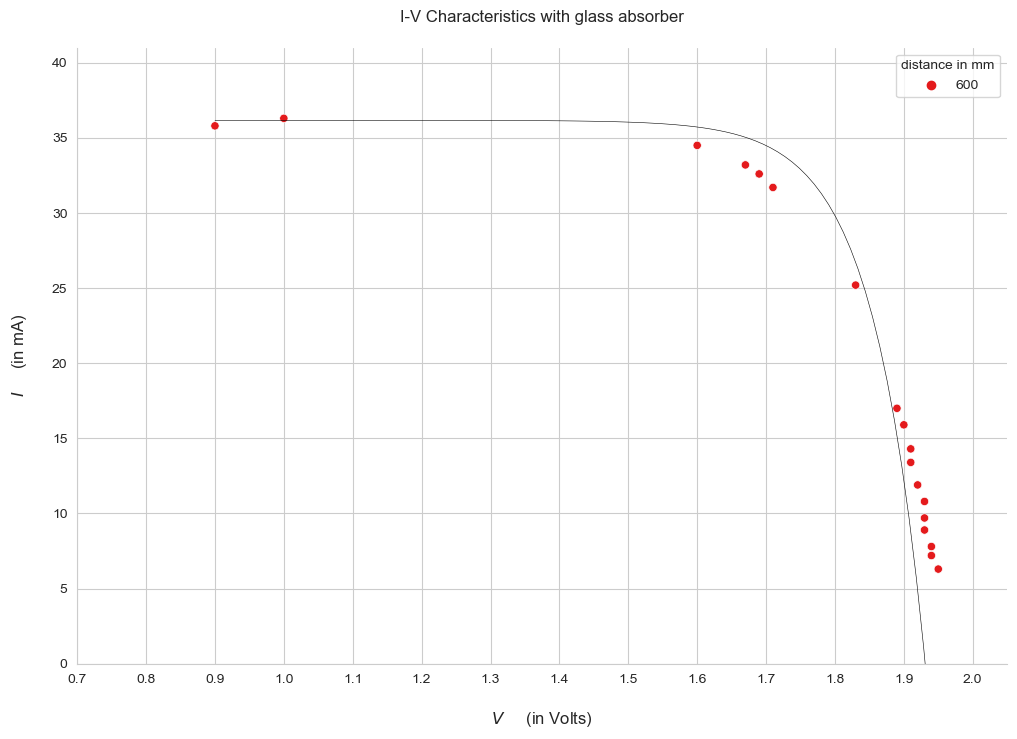

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
# sns.lineplot(data=data5, x='V in V', y='I in mA', hue='distance in mm', palette='Set1', linewidth=0.4)
plt.plot(x5f, y5f, 'black', lw=0.4)
sns.scatterplot(data=data5, x='V in V', y='I in mA', hue='distance in mm', 
                style='distance in mm', palette='Set1')
sns.despine()
plt.title('I-V Characteristics with glass absorber\n')
plt.xlabel('\n$V$\t(in Volts)', fontsize=12)
plt.ylabel('$I$\t(in mA)\n', fontsize=12)
plt.xlim(0.7, 2.05)
plt.ylim(0, 41)
plt.xticks(np.arange(0.7, 2.05, 0.1))
plt.yticks(np.arange(0, 41, 5))
plt.savefig('plot5', dpi=300)
# plt.savefig('I-V Characteristics with glass absorber', dpi=300)
plt.show()

### I-V characteristics at 600mm distance

In [19]:
data7 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot7')
display(data7.head())
x7 = data7['V in V'].to_numpy()
y7 = data7['I in mA'].to_numpy()
x71, y71 = x7[:15], y7[:15]
x72, y72 = x7[15:32], y7[15:32]
x73, y73 = x7[32:50], y7[32:50]

,Condition,V in V,I in mA
0,Normal,2.00,8.5
1,Normal,2.00,9.0
2,Normal,2.00,9.7
3,Normal,2.00,10.4
4,Normal,1.99,11.5


In [20]:
popt, pcov = curve_fit(Ifit, x71, y71, p0=[45,1e-6,8])
p1, p2, p3 = popt
x71f = np.linspace(x71.min(), x71.max(), 100)
y71f = Ifit(x71f, p1, p2, p3)
print(f'Fitting parameters: {p1, p2, p3}')

popt, pcov = curve_fit(Ifit, x72, y72, p0=[40,1e-6,8])
p1, p2, p3 = popt
x72f = np.linspace(x72.min(), x72.max(), 100)
y72f = Ifit(x72f, p1, p2, p3)
print(f'Fitting parameters: {p1, p2, p3}')

popt, pcov = curve_fit(Ifit, x73, y73, p0=[36,1e-6,8])
p1, p2, p3 = popt
x73f = np.linspace(x73.min(), x73.max(), 100)
y73f = Ifit(x73f, p1, p2, p3)
print(f'Fitting parameters: {p1, p2, p3}')


Fitting parameters: (45.19780419694685, 8.554183195928145e-06, 7.630798922727154)
Fitting parameters: (44.553460129066536, 0.0006194916060468891, 5.559496641176257)
Fitting parameters: (36.16590628199195, 3.435413236333165e-06, 8.210669819937078)


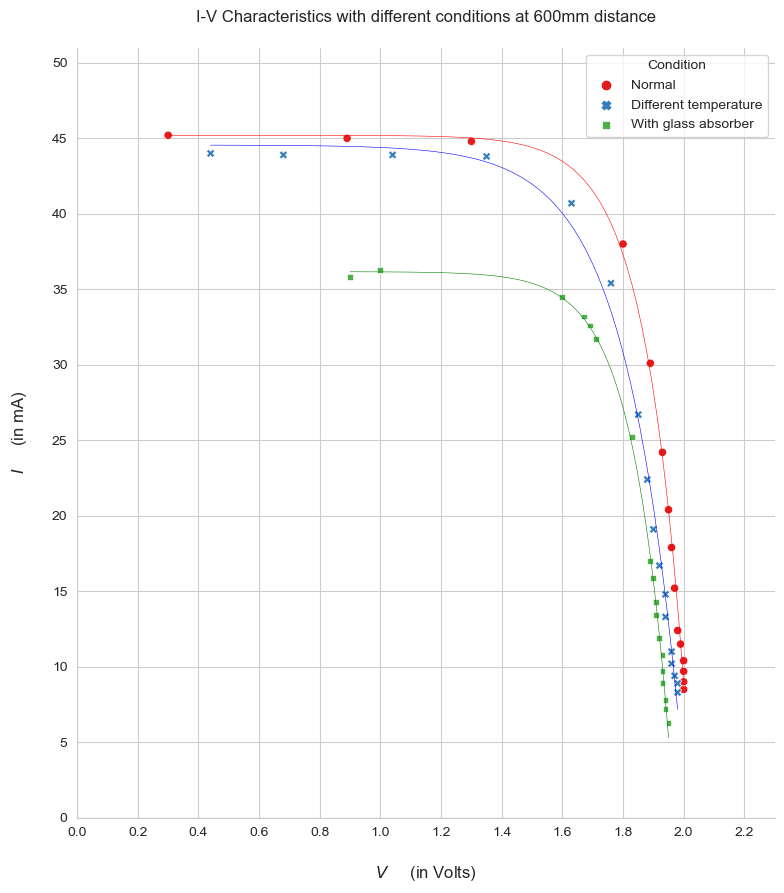

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,10))
# sns.lineplot(data=data7, x='V in V', y='I in mA', hue='Condition', palette='Set1', linewidth=0.4)
plt.plot(x71f, y71f, 'red', lw=0.4)
plt.plot(x72f, y72f, 'blue', lw=0.4)
plt.plot(x73f, y73f, 'green', lw=0.4)
sns.scatterplot(data=data7, x='V in V', y='I in mA', hue='Condition', 
                style='Condition', palette='Set1')
sns.despine()
plt.title('I-V Characteristics with different conditions at 600mm distance\n')
plt.xlabel('\n$V$\t(in Volts)', fontsize=12)
plt.ylabel('$I$\t(in mA)\n', fontsize=12)
plt.xlim(0,2.3)
plt.ylim(0, 51)
plt.xticks(np.arange(0, 2.3, 0.2))
plt.yticks(np.arange(0, 51, 5))
plt.savefig('plot7', dpi=300)
# plt.savefig('I-V Characteristics with different conditions at 600mm distance', dpi=300)
plt.show()

### Power-resistance plots with normal conditions

In [22]:
data6 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot6')
display(data6.head())
# x3 = data3['V in V'].to_numpy()
# y3 = data3['I in mA'].to_numpy()
# x31, y31 = x3[:17], y3[:17]
# x32, y32 = x3[18:32], y3[18:32]
# x33, y33 = x3[33:47], y3[33:47]
# x34, y34 = x3[47:], y3[47:]

,distance in mm,R in kOhm,P in mW
0,500,0.235632,17.835
1,500,0.222826,18.860
2,500,0.211340,19.885
3,500,0.188889,22.032
4,500,0.171429,24.276


In [23]:
x61f = x31f/y31f
y61f = x31f*y31f

x62f = x32f/y32f
y62f = x32f*y32f

x63f = x33f/y33f
y63f = x33f*y33f

x64f = x34f/y34f
y64f = x34f*y34f

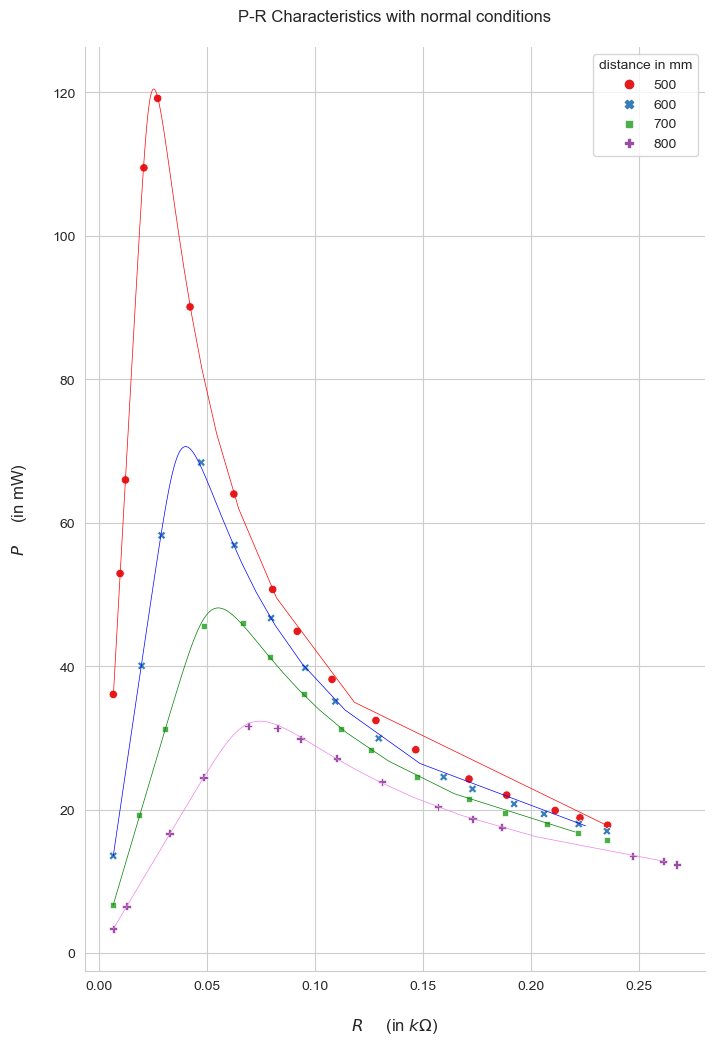

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,12))
# sns.lineplot(data=data6, x='R in kOhm', y='P in mW', hue='distance in mm', palette='Set1', linewidth=0.4)
plt.plot(x61f, y61f, 'red', lw=0.5)
plt.plot(x62f, y62f, 'blue', lw=0.5)
plt.plot(x63f, y63f, 'green', lw=0.5)
plt.plot(x64f, y64f, 'violet', lw=0.5)
sns.scatterplot(data=data6, x='R in kOhm', y='P in mW', hue='distance in mm', 
                style='distance in mm', palette='Set1')
sns.despine()
plt.title('P-R Characteristics with normal conditions\n')
plt.xlabel('\n$R$\t(in $k\Omega$)', fontsize=12)
plt.ylabel('$P$\t(in mW)\n', fontsize=12)
# plt.xlim(0,2.3)
# plt.xticks(np.arange(0, 2.3, 0.2))
# plt.yticks(np.arange(0, 80, 5))
plt.savefig('plot6', dpi=300)
# plt.savefig('P-R Characteristics with normal conditions', dpi=300)
plt.show()

In [25]:
display(maxfinder(x61f, y61f), maxfinder(x62f, y62f),
        maxfinder(x63f, y63f), maxfinder(x64f, y64f))

(0.025437543508364007, 120.47631794410512)

(0.04048800037992792, 70.61780100003296)

(0.05551886322581902, 48.129030551521474)

(0.07512005070983697, 32.333245252173135)

### Power-resistance plots with different conditions at 600mm distance

In [26]:
data8 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot8')
display(data8.head())
x8 = data8['R in kOhm'].to_numpy()
y8 = data8['P in mW'].to_numpy()
x81, y81 = x8[:15], y8[:15]
x82, y82 = x8[15:32], y8[15:32]
x83, y83 = x8[32:], y8[32:]

,Condition,R in kOhm,P in mW
0,Normal,0.235294,17.000
1,Normal,0.222222,18.000
2,Normal,0.206186,19.400
3,Normal,0.192308,20.800
4,Normal,0.173043,22.885


In [27]:
# pfit = polyfit(x81, y81, 8)
# dg = pfit.size-1
# x81f = np.linspace(x81.min(), x81.max(), 50)
# yfn = lambda x: sum([pfit.T[i]*x**(dg-i) for i in range(dg)])
# y81f = yfn(x81f)

x81f = x71f/y71f
y81f = x71f*y71f

x82f = x72f/y72f
y82f = x72f*y72f

x83f = x73f/y73f
y83f = x73f*y73f

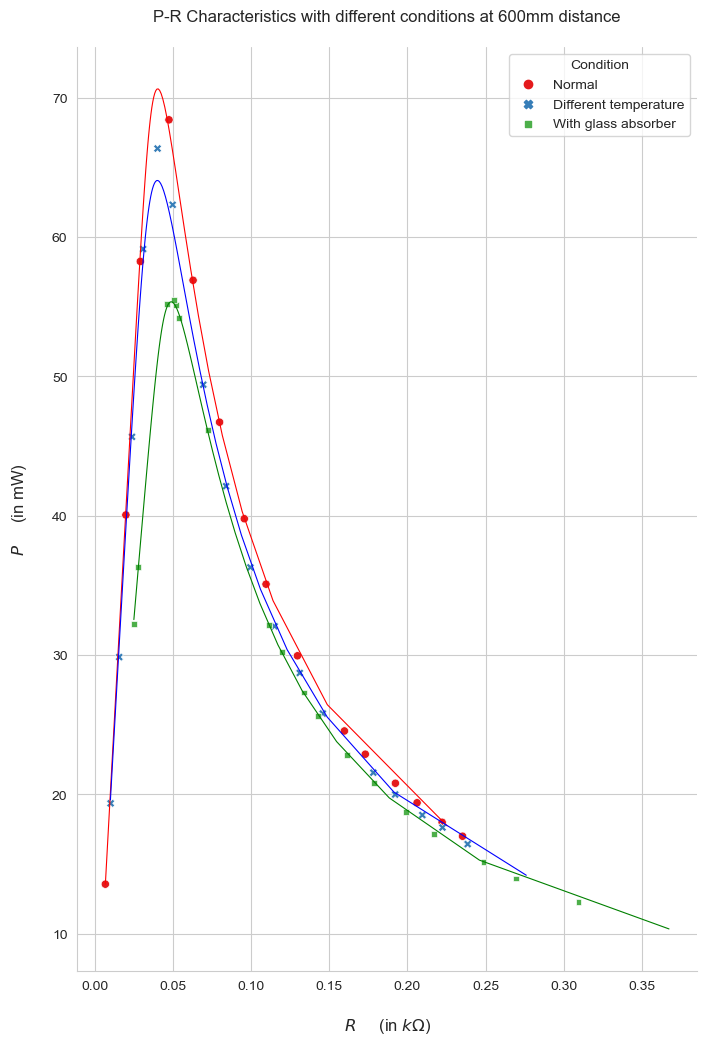

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,12))
# sns.lineplot(data=data8, x='R in kOhm', y='P in mW', hue='Condition', palette='Set1', linewidth=0.4)
plt.plot(x81f, y81f, 'red', lw=0.8)
plt.plot(x82f, y82f, 'blue', lw=0.8)
plt.plot(x83f, y83f, 'green', lw=0.8)
sns.scatterplot(data=data8, x='R in kOhm', y='P in mW', hue='Condition', 
                style='Condition', palette='Set1')
sns.despine()
plt.title('P-R Characteristics with different conditions at 600mm distance\n')
plt.xlabel('\n$R$\t(in $k\Omega$)', fontsize=12)
plt.ylabel('$P$\t(in mW)\n', fontsize=12)
# plt.xlim(0,2.3)
# plt.xticks(np.arange(0, 2.3, 0.2))
# plt.yticks(np.arange(0, 80, 5))
plt.savefig('plot8', dpi=300)
# plt.savefig('P-R Characteristics with different conditions at 600mm distance', dpi=300)
plt.show()

In [29]:
# display(maxfinder(x81f, y81f), maxfinder(x82f, y82f),
#         maxfinder(x83f, y83f))